# Iris

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# download data
iris = pd.read_csv("https://myslu.stlawu.edu/~ltorrey/ml/Iris.csv")
iris.head()

In [ ]:
# quick visual
plot = sns.pairplot(data = iris, hue = "species")

# dimensions
iris.shape

# catagory counts
iris["species"].value_counts()

# Classifiers

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# seperate features and target
x = iris.drop("species", axis = 1)
y = iris["species"]

# now build NB classifier and fit to dataset
naive = GaussianNB().fit(x,y)
# predict for first 3 of dataset
naive.predict(x[0:3])

In [ ]:
# LDA classifier
lda = LinearDiscriminantAnalysis().fit(x,y)
lda.predict(x[0:3])

# Testing

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y, stratify = y, test_size = 0.5)

# NB Test
naive = GaussianNB().fit(xtrain,ytrain)
# Gives accuracy
naive.score(xtest,ytest)

# LDA Test
lda = LinearDiscriminantAnalysis().fit(xtrain,ytrain)
lda.score(xtest,ytest)


0.9866666666666667

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# cross validated accuracy
naive = GaussianNB() # create unfitted object
cross_val_score(naive, x, y).mean()

0.9533333333333334

In [ ]:
lda = LinearDiscriminantAnalysis()
cross_val_score(lda,x, y).mean()

0.9800000000000001

# Titanic

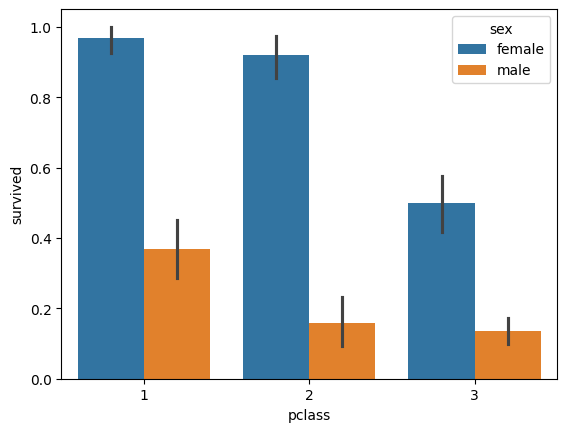

In [ ]:
titanic = pd.read_csv("https://myslu.stlawu.edu/~ltorrey/ml/Titanic.csv")
titanic.head()

# Check for trends
plot = sns.barplot(data = titanic, x = "pclass", y = "survived", hue = "sex")

# Count missing values
titanic.isnull().sum()

# drop cabin and name column
titanic.drop(["name", "cabin"], axis = 1, inplace=True)


# Classification with processing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

x = titanic.drop("survived", axis = 1)
y = titanic["survived"]

transformer = make_column_transformer(
    (OneHotEncoder(drop="first"), ["sex"]),
    (SimpleImputer(add_indicator = True), ["age"]),
    remainder = "passthrough"
)

# NB accurarcy
naive = make_pipeline(transformer, GaussianNB())
cross_val_score(naive,x,y).mean()


0.7610193961458792

In [ ]:
# LDA accuracy
LDA = make_pipeline(transformer, LinearDiscriminantAnalysis())
cross_val_score(LDA,x,y).mean()

0.7912309334002888